## Upload Required Libraries

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
warnings.filterwarnings( "ignore")


## Importing data

In [2]:
df = pd.read_excel('Election_Data.xlsx')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


## EDA

**Shape**

In [4]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


**Data type of data features**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


**Null value Check**

In [6]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [7]:
df = df.iloc[: , 1:]

**Making different list for categorical columns and numerical columns**


In [8]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


The above output shows that there is no “null” value in our dataset.

Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of 
missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables 
with values as “?”.

In [9]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


# Data preprocessing




we need some summary statistics of our dataframe. For this, we can use describe() 
method. It can be used to generate various summary statistics.

#### Describe for numerical and categorical columns


In [10]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


**Are there any duplicate records, Check for duplicate data**

In [12]:

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [13]:
df.drop_duplicates(inplace=True)

### unique values for categorical variables

In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




**Univariate Analysis**

In [15]:
print(num)


['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


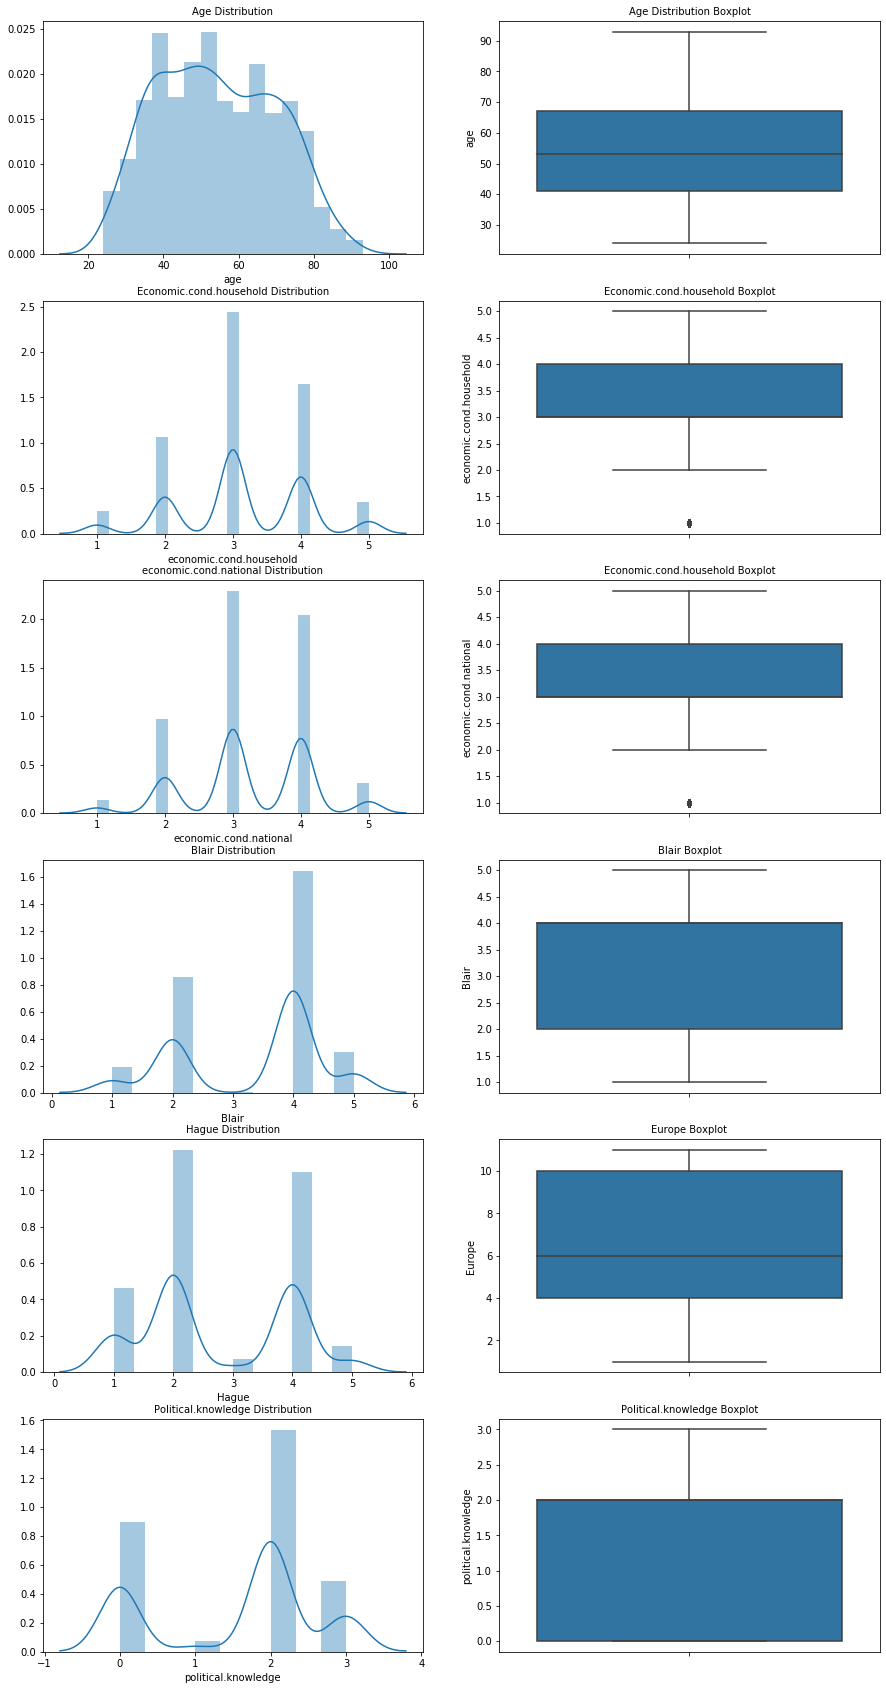

In [16]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(15,30)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Distribution Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.household'] , ax=axes[1][0])
a.set_title("Economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[1][1])
a.set_title("Economic.cond.household Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[2][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[2][1])
a.set_title("Economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[4][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[5][0])
a.set_title("Political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[5][1])
a.set_title("Political.knowledge Boxplot",fontsize=10)



plt.show()

###  Bivariate and Multivariate Analysis

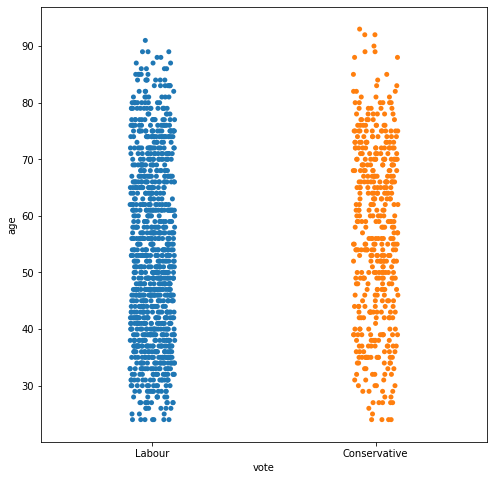

In [17]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

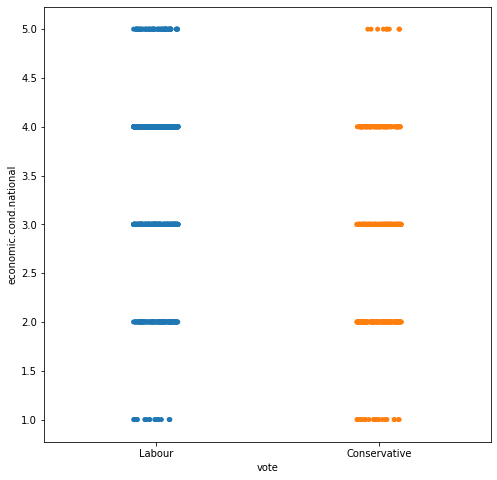

In [18]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

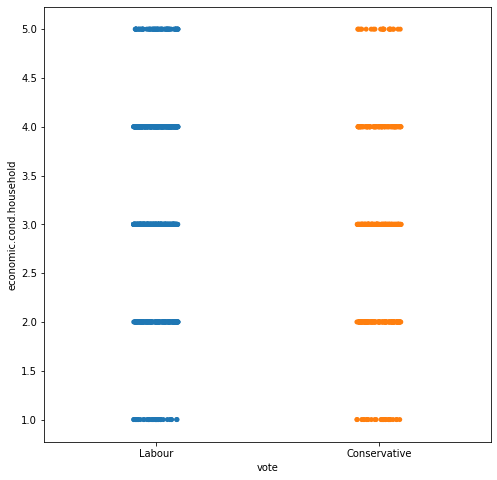

In [19]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

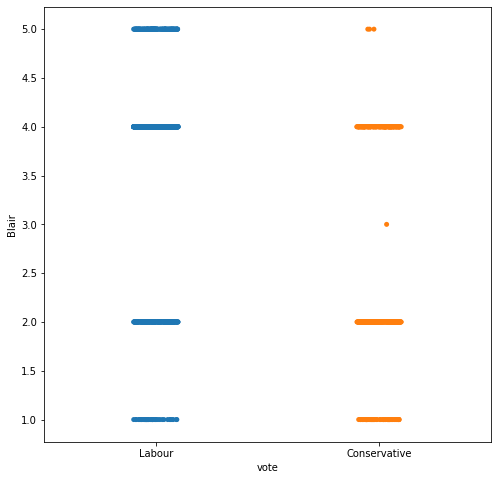

In [20]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

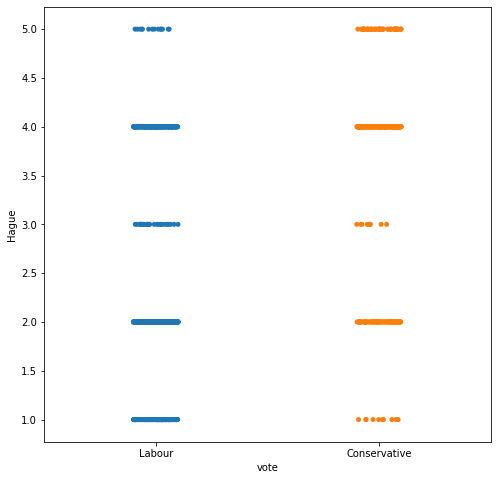

In [21]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

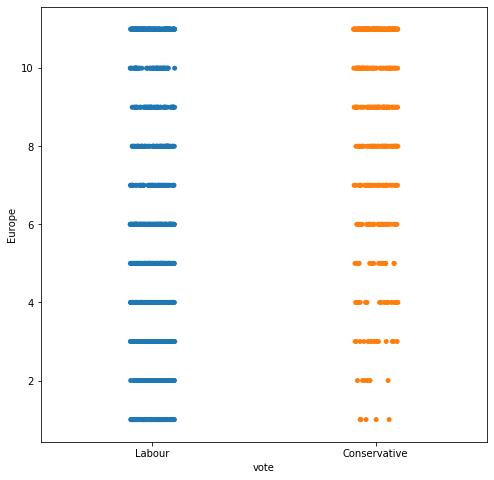

In [22]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

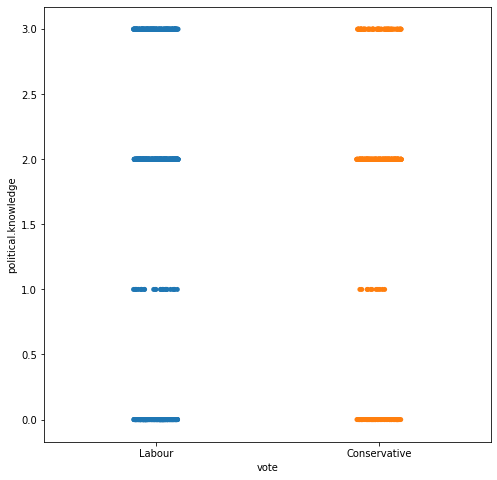

In [36]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

In [24]:
pd.crosstab(df['economic.cond.national'],df.vote,margins=True).style.background_gradient(cmap='summer_r')

vote,Conservative,Labour,All
economic.cond.national,,,
1,21,16,37
2,140,116,256
3,199,405,604
4,91,447,538
5,9,73,82
All,460,1057,1517


In [28]:
pd.crosstab(df['economic.cond.household'],df.vote,margins=True).style.background_gradient(cmap='summer_r')

vote,Conservative,Labour,All
economic.cond.household,,,
1,28,37,65
2,126,154,280
3,197,448,645
4,86,349,435
5,23,69,92
All,460,1057,1517


In [29]:
pd.crosstab(df['Blair'],df.vote,margins=True).style.background_gradient(cmap='summer_r')

vote,Conservative,Labour,All
Blair,,,
1,59,38,97
2,240,194,434
3,1,0,1
4,157,676,833
5,3,149,152
All,460,1057,1517


In [30]:
pd.crosstab(df['Hague'],df.vote,margins=True).style.background_gradient(cmap='summer_r')

vote,Conservative,Labour,All
Hague,,,
1,11,222,233
2,95,522,617
3,9,28,37
4,286,271,557
5,59,14,73
All,460,1057,1517


In [31]:
pd.crosstab(df['Europe'],df.vote,margins=True).style.background_gradient(cmap='summer_r')

vote,Conservative,Labour,All
Europe,,,
1,5,104,109
2,6,71,77
3,14,114,128
4,18,108,126
5,20,103,123
6,35,172,207
7,32,54,86
8,48,63,111
9,56,55,111


In [32]:
pd.crosstab(df['political.knowledge'],df.vote,margins=True).style.background_gradient(cmap='summer_r')

vote,Conservative,Labour,All
political.knowledge,,,
0,94,360,454
1,11,27,38
2,283,493,776
3,72,177,249
All,460,1057,1517


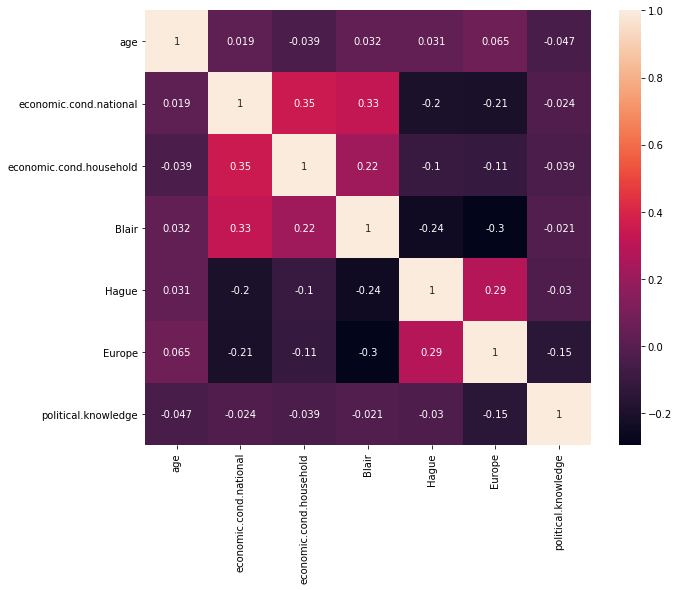

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

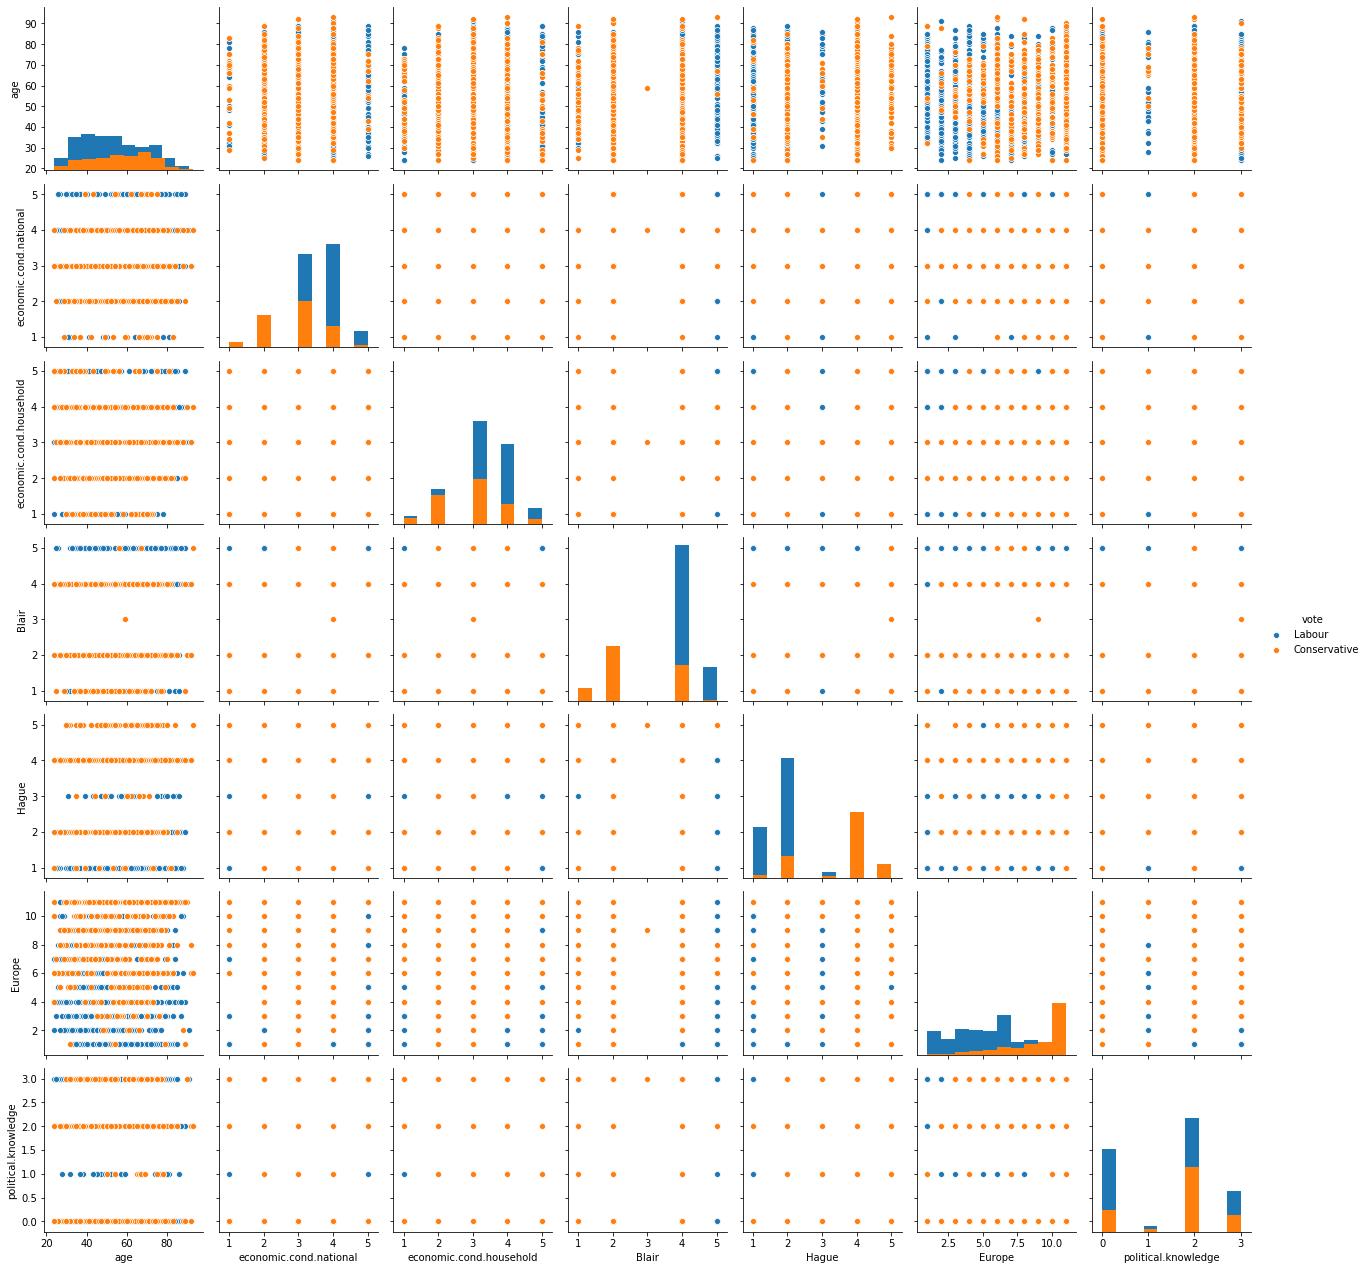

In [34]:
fig.set_size_inches(15,15)
a = sns.pairplot(df ,diag_kind='hist' ,hue='vote');



#### Outlier Check

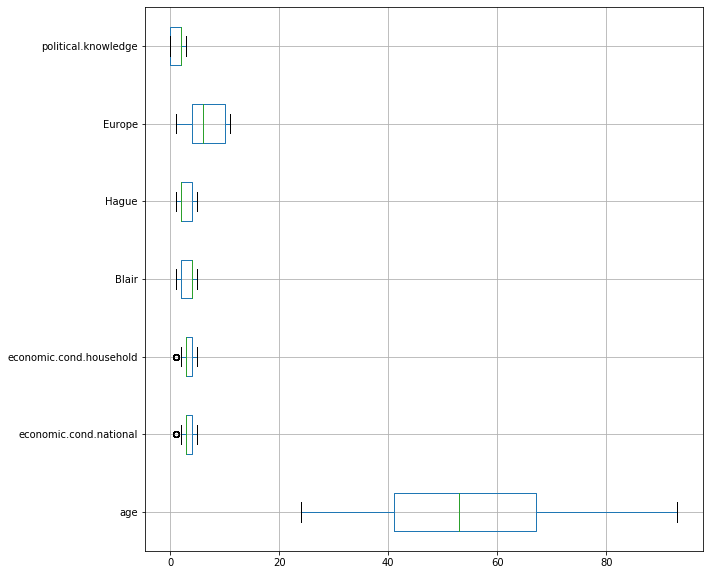

In [40]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
for column in df.iloc[:, 1:7].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

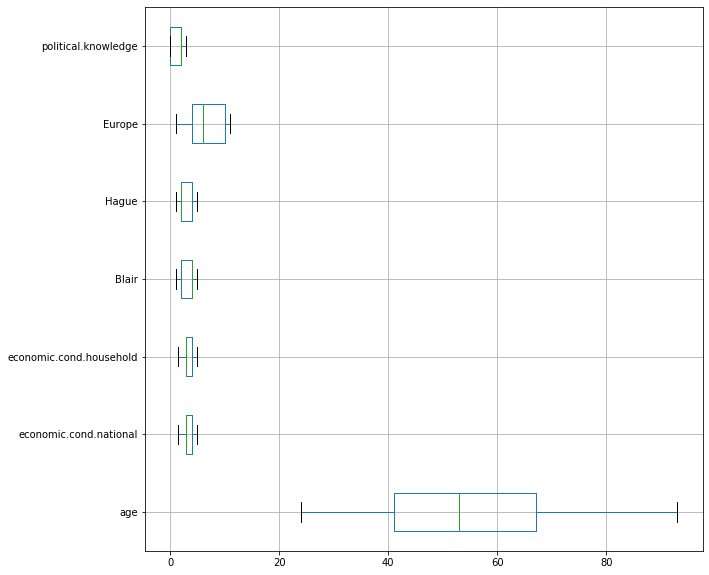

In [43]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [44]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [45]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2,1,1


**Train-Test Split**
Split X and y into training and test set in 70:30 ratio with random_state=1

In [46]:
# Arrange data into independent variables and dependent variables
X = df.drop("vote_Labour",axis=1)  ## Features
y = df["vote_Labour"]  ## Target

In [47]:

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Logistic regression 

In [55]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
model_lr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_lr.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [56]:
ytrain_predict_lr = model_lr.predict(X_train)
ytest_predict_lr = model_lr.predict(X_test)

In [57]:
## Performance Matrix on train data set
y_train_predict = model_lr.predict(X_train)
model_score = model_lr.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[197 110]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [58]:
## Performance Matrix on test data set
y_test_predict = model_lr.predict(X_test)
model_score = model_lr.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[111  42]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [59]:
# Training Data Probability Prediction
pred_prob_train_lr = model_lr.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_lr = model_lr.predict_proba(X_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


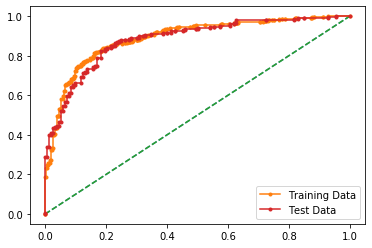

In [60]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_lr[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_lr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_lr[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_lr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Linear Discriminant Analysis

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,y_train)

In [62]:
## Performance Matrix on train data set
y_train_predict = model_lda.predict(X_train)
model_score = model_lda.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [63]:
y_test_predict = model_lda.predict(X_test)
model_score = model_lda.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [64]:
# Training Data Probability Prediction
pred_prob_train = model_lda.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model_lda.predict_proba(X_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


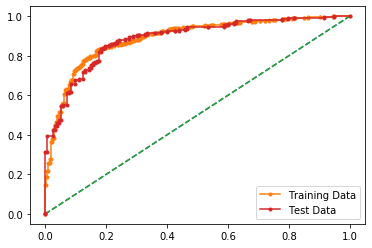

In [65]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


# Gaussian Naive Bayes


In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [67]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

**Performance Matrix on train data set**

In [68]:
y_train_predict_NB = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict_NB))     ## classification_report

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [69]:
## Performance Matrix on test data set
y_test_predict_NB = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_NB))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict_NB))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [70]:
# Training Data Probability Prediction
pred_prob_train_NB = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_NB = NB_model.predict_proba(X_test)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.876


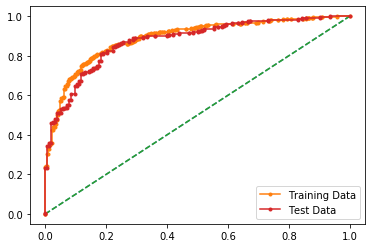

In [71]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_NB[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_NB[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


## KNN Model

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

**Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered**

Now lets apply zscore on continues columns and see the performance for KNN

In [72]:
# Arrange data into independent variables and dependent variables
X =  df.drop("vote_Labour",axis=1) ## Features
y = df["vote_Labour"]  ## Target

In [73]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender_male"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender_male"]].apply(zscore)

In [74]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [75]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8708765315739868
[[238  83]
 [ 54 686]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       321
           1       0.89      0.93      0.91       740

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [78]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[ 94  45]
 [ 36 281]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       139
           1       0.86      0.89      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [79]:
# Training Data Probability Prediction
pred_prob_train_knn= KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_knn = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.936
AUC for the Test Data: 0.839


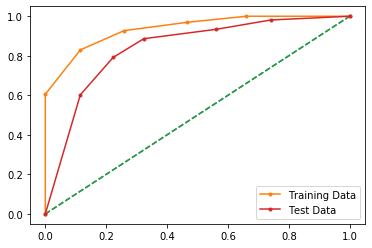

In [80]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_knn[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_knn[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


# MODEL TUNING!!


## Logistic Regression

In [81]:
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [82]:

best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=11.288378916846883, solver='liblinear')

In [83]:

print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.8223684210526315


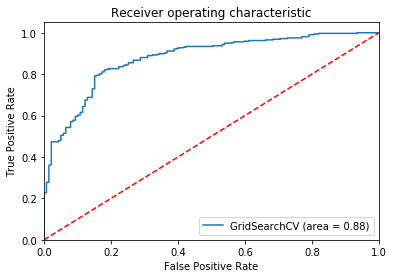

In [84]:

probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [85]:
## Performance Matrix on train data set
y_train_predict = clf.predict(X_train)
model_score = clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444863336475024
[[218 103]
 [ 62 678]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       321
           1       0.87      0.92      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [86]:
## Performance Matrix on test data set
y_test_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[ 92  47]
 [ 34 283]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       139
           1       0.86      0.89      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



In [87]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Cross-Validation Accuracy Scores [0.81308411 0.83018868 0.80188679 0.83018868 0.88679245 0.87735849
 0.83018868 0.86792453 0.83018868 0.83018868]


In [88]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8018867924528302, 0.8397989772526891, 0.8867924528301887)

In [89]:
#compared to the original LOGISTIC REGRESSION model:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_lr, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Cross-Validation Accuracy Scores [0.81308411 0.83018868 0.79245283 0.83962264 0.88679245 0.87735849
 0.8490566  0.8490566  0.82075472 0.85849057]


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

In [90]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7924528301886793, 0.8416857697055192, 0.8867924528301887)

## Linear Discriminant Analysis:


In [91]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
# Arrange data into independent variables and dependent variables
X = df.drop("vote_Labour",axis=1)  ## Features
y = df["vote_Labour"]  ## Target
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.833 (0.027)


In [92]:

# grid search solver for lda
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X = df.drop("vote_Labour",axis=1)  ## Features
y = df["vote_Labour"]  ## Target
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.833
Config: {'solver': 'svd'}


## KNN

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [99]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22368421052631582,
 0.1907894736842105,
 0.17763157894736847,
 0.19736842105263153,
 0.19298245614035092,
 0.19517543859649122,
 0.1885964912280702,
 0.1864035087719298,
 0.19298245614035092,
 0.1907894736842105]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

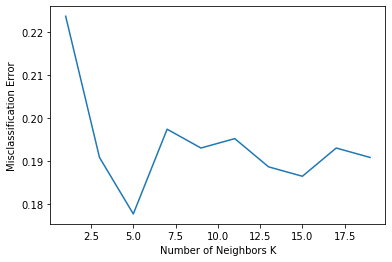

In [100]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 15 it is giving the best test accuracy lets check train and test for K=15 with other evaluation metrics

In [137]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)

KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [138]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8548539114043355
[[229  92]
 [ 62 678]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       321
           1       0.88      0.92      0.90       740

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [139]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[ 92  47]
 [ 38 279]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       139
           1       0.86      0.88      0.87       317

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



In [140]:
# Training Data Probability Prediction
pred_prob_train= KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.919
AUC for the Test Data: 0.871


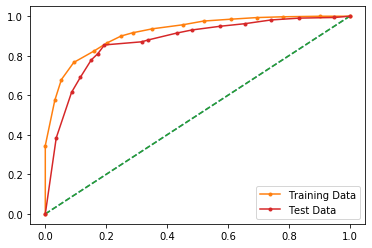

In [141]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [142]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_predict)))
print('Precision Score : ' + str(precision_score(y_test,y_test_predict)))
print('Recall Score : ' + str(recall_score(y_test,y_test_predict)))
print('F1 Score : ' + str(f1_score(y_test,y_test_predict)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_test_predict)))

Accuracy Score : 0.8135964912280702
Precision Score : 0.8558282208588958
Recall Score : 0.8801261829652997
F1 Score : 0.8678071539657853
Confusion Matrix : 
[[ 92  47]
 [ 38 279]]


## KNN With SMOTE


In [109]:
from imblearn.over_sampling import SMOTE

In [110]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [111]:

X_train_res.shape

(1480, 8)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier(n_neighbors=15)
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=15)

In [113]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8648648648648649
[[671  69]
 [131 609]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       740
           1       0.90      0.82      0.86       740

    accuracy                           0.86      1480
   macro avg       0.87      0.86      0.86      1480
weighted avg       0.87      0.86      0.86      1480



In [114]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[114  25]
 [ 60 257]]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       139
           1       0.91      0.81      0.86       317

    accuracy                           0.81       456
   macro avg       0.78      0.82      0.79       456
weighted avg       0.83      0.81      0.82       456



# Ada Boost


In [115]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [116]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8426013195098964
[[219 102]
 [ 65 675]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [117]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[ 95  44]
 [ 40 277]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       139
           1       0.86      0.87      0.87       317

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.81      0.82      0.82       456



In [118]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_predict)))
print('Precision Score : ' + str(precision_score(y_test,y_test_predict)))
print('Recall Score : ' + str(recall_score(y_test,y_test_predict)))
print('F1 Score : ' + str(f1_score(y_test,y_test_predict)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_test_predict)))

Accuracy Score : 0.8157894736842105
Precision Score : 0.8629283489096573
Recall Score : 0.8738170347003155
F1 Score : 0.8683385579937305
Confusion Matrix : 
[[ 95  44]
 [ 40 277]]


AUC for the Training Data: 0.919
AUC for the Test Data: 0.871


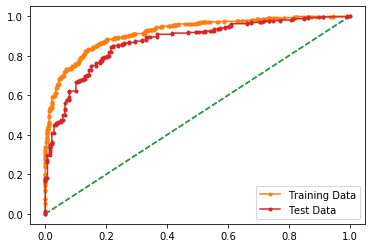

In [119]:
# Training Data Probability Prediction
pred_prob_trainADB_model= ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_testADB_model = ADB_model.predict_proba(X_test)



# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_trainADB_model[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_trainADB_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_testADB_model [:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_testADB_model [:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


# Gradient Boosting¶


In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [121]:
## Performance Matrix on train data set
y_train_predict_gbcl = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gbcl))
print(metrics.classification_report(y_train, y_train_predict_gbcl))

0.8953817153628653
[[254  67]
 [ 44 696]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       321
           1       0.91      0.94      0.93       740

    accuracy                           0.90      1061
   macro avg       0.88      0.87      0.87      1061
weighted avg       0.89      0.90      0.89      1061



In [122]:
## Performance Matrix on test data set
y_test_predict_gbcl = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gbcl))
print(metrics.classification_report(y_test, y_test_predict_gbcl))# Model Evaluation metrics 


0.8289473684210527
[[ 93  46]
 [ 32 285]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       139
           1       0.86      0.90      0.88       317

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [123]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_predict_gbcl)))
print('Precision Score : ' + str(precision_score(y_test,y_test_predict_gbcl)))
print('Recall Score : ' + str(recall_score(y_test,y_test_predict_gbcl)))
print('F1 Score : ' + str(f1_score(y_test,y_test_predict_gbcl)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_test_predict_gbcl)))

Accuracy Score : 0.8289473684210527
Precision Score : 0.8610271903323263
Recall Score : 0.8990536277602523
F1 Score : 0.8796296296296297
Confusion Matrix : 
[[ 93  46]
 [ 32 285]]


AUC for the Training Data: 0.957
AUC for the Test Data: 0.884


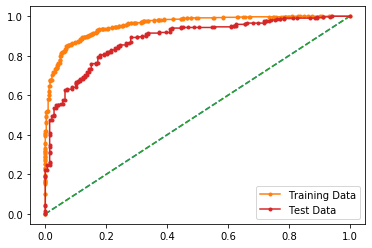

In [124]:
# Training Data Probability Prediction
pred_prob_trainADB_gbcl= gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_testADB_gbcl = gbcl.predict_proba(X_test)



# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_trainADB_gbcl[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_trainADB_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_testADB_gbcl [:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_testADB_gbcl [:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Bagging

In [125]:
# initialize the base classifier
from sklearn.ensemble import RandomForestClassifier

base_cls = RandomForestClassifier(n_estimators=100,random_state=1,max_depth= 8,min_samples_split=20,min_samples_leaf=10)

In [126]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=base_cls,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        min_samples_leaf=10,
                                                        min_samples_split=20,
                                                        random_state=1),
                  n_estimators=100, random_state=1)

In [127]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[212 109]
 [ 46 694]]
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       321
           1       0.86      0.94      0.90       740

    accuracy                           0.85      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [128]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8092105263157895
[[ 80  59]
 [ 28 289]]
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       139
           1       0.83      0.91      0.87       317

    accuracy                           0.81       456
   macro avg       0.79      0.74      0.76       456
weighted avg       0.80      0.81      0.80       456



In [129]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_predict)))
print('Precision Score : ' + str(precision_score(y_test,y_test_predict)))
print('Recall Score : ' + str(recall_score(y_test,y_test_predict)))
print('F1 Score : ' + str(f1_score(y_test,y_test_predict)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_test_predict)))

Accuracy Score : 0.8092105263157895
Precision Score : 0.8304597701149425
Recall Score : 0.9116719242902208
F1 Score : 0.8691729323308272
Confusion Matrix : 
[[ 80  59]
 [ 28 289]]


AUC for the Training Data: 0.924
AUC for the Test Data: 0.877


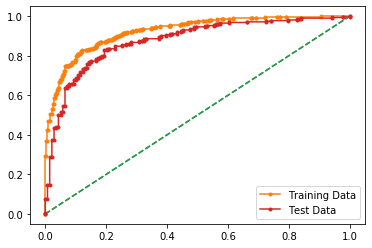

In [130]:
# Training Data Probability Prediction
pred_prob_trainADB_Bagging_model= Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_testADB_Bagging_model = Bagging_model.predict_proba(X_test)



# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_trainADB_Bagging_model[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_trainADB_Bagging_model[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_testADB_Bagging_model [:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_testADB_Bagging_model [:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# XG Boost

In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb



In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
## Performance Matrix on train data set
y_train_predict = xg_reg.predict(X_train)
model_score =xg_reg.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))